# Tricks of the trade TF/Keras [small dataset]

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras. It uses a small data set so that it can be trained on the CPU.

Below are several experiments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Keras 2.1.4 TF 1.6.0 Python sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
(4000, 1, 28, 28) (4000,) 28


Using TensorFlow backend.


### Suggestions for the experiment

Let the experiments run for 100 epochs. You might need to restart the kernel so that namings of the layers are the same

* with init zero 
* with sigmoid activation 
* with ReLU activation
* with dropout (p=0.3)
* with batch-normalization and dropout

In [ ]:
### First model with all zeros
name = 'sigmoid_init0'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784), kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(50,kernel_initializer='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax',kernel_initializer='zero'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Model with default initialization 
name = 'sigmoid'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Relu 
name = 'relu'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Dropout
name = 'dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [2]:
### Batchnorm
name = 'batch_dropout'
model = Sequential()

model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

### Untrained model


In [4]:
np.log(0.1)

-2.3025850929940455

In [5]:
model.evaluate(X[0:2000], convertToOneHot(y[0:2000],10))

2000/2000 [==============================] - 0s 222us/step


[2.6399889869689943, 0.1]

In [6]:
model.predict_classes(X[0:10])

array([9, 4, 9, 6, 1, 4, 4, 2, 4, 9])

## Training

In [7]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          epochs=30, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


Train on 2400 samples, validate on 600 samples
Epoch 1/30
 - 1s - loss: 1.4128 - acc: 0.5567 - val_loss: 0.6863 - val_acc: 0.8400
Epoch 2/30
 - 1s - loss: 0.7312 - acc: 0.8246 - val_loss: 0.5190 - val_acc: 0.8683
Epoch 3/30
 - 1s - loss: 0.5554 - acc: 0.8833 - val_loss: 0.4305 - val_acc: 0.8833
Epoch 4/30
 - 1s - loss: 0.4472 - acc: 0.9063 - val_loss: 0.3889 - val_acc: 0.8917
Epoch 5/30
 - 1s - loss: 0.3631 - acc: 0.9296 - val_loss: 0.3659 - val_acc: 0.9033
Epoch 6/30
 - 1s - loss: 0.3144 - acc: 0.9375 - val_loss: 0.3433 - val_acc: 0.9083
Epoch 7/30
 - 1s - loss: 0.2843 - acc: 0.9342 - val_loss: 0.3276 - val_acc: 0.9117
Epoch 8/30
 - 1s - loss: 0.2302 - acc: 0.9575 - val_loss: 0.3235 - val_acc: 0.9167
Epoch 9/30
 - 1s - loss: 0.2065 - acc: 0.9579 - val_loss: 0.3185 - val_acc: 0.9167
Epoch 10/30
 - 1s - loss: 0.1865 - acc: 0.9617 - val_loss: 0.3147 - val_acc: 0.9183
Epoch 11/30
 - 1s - loss: 0.1603 - acc: 0.9667 - val_loss: 0.3124 - val_acc: 0.9083
Epoch 12/30
 - 1s - loss: 0.1435 - acc

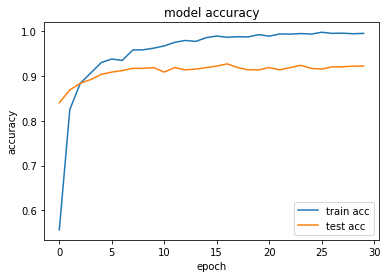

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc='lower right')
plt.show()

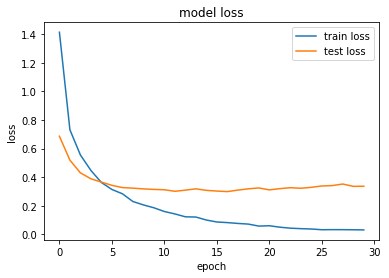

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [ ]:
!tensorboard --logdir=tensorboard/mnist_small/